<a href="https://colab.research.google.com/github/LeoProvorov/Templates/blob/main/%D0%93%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


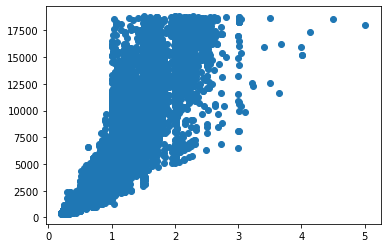

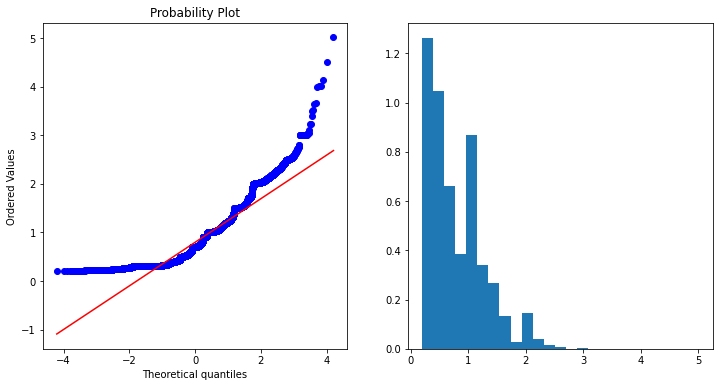

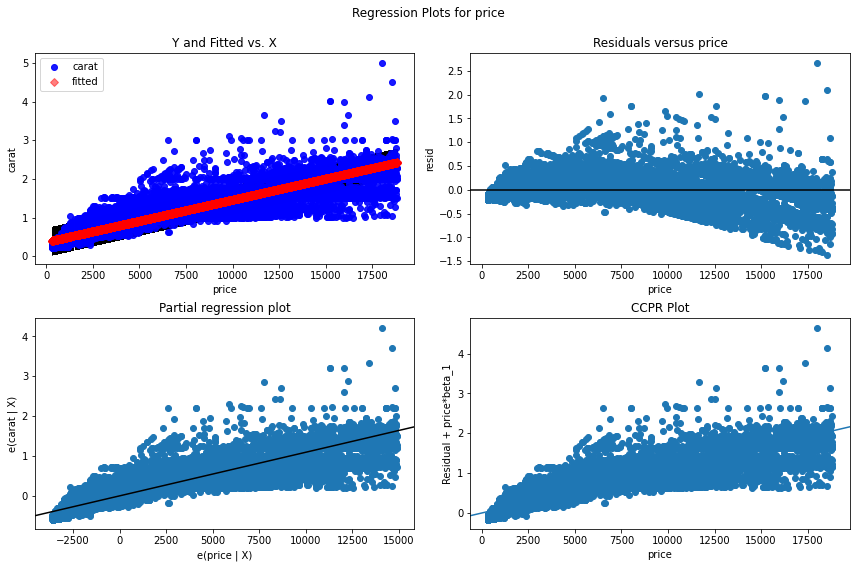

In [1]:
# гетероскедастичности - неравномерность распределения точек данных по отношению к линейной регрессии
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Данные цена алмаза - карат
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
#diamonds.head(3)

data = diamonds[['carat', 'price']].values

# диаграмма рассеяния
plt.scatter(x=data[:, 0], y=data[:, 1])


# QQ-Plot
plt.rcParams['figure.figsize'] = [12, 6]
sequence = data[:, 0]

fig, (ax1, ax2) = plt.subplots(1, 2)
stats.probplot(sequence, dist="norm", plot=ax1)
# распределение ненормальное
count, bins, ignored = ax2.hist(sequence, 25, density=True)

# РАСПРЕДЕЛЕНИЕ ОСТАТКОВ
model = ols('carat ~ price', data=diamonds).fit()

#view model summary
# print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'price', fig=fig)